## HYPOTHESIS EVALUATION USING LINEAR REGRESSION AND CROSS-VALIDATION
## Bias and Variance Study (First and Higher Order Polynomial functions)

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.io import loadmat

## Linear Regression Functions with Regularisation

In [23]:
def feat_norm(X):
    mu = np.mean(X, axis=0)
    sd = np.std(X, axis=0, ddof=1)
    X_norm = (X- mu)/sd
    return X_norm, mu, sd

def cost_grad(theta, X, y, lmb):
    m,n = X.shape
    h = X.dot(theta)
    error = h - y
    
    J_norm = 1/(2*m) * (sum(error**2))
    reg_term = lmb/(2*m) * (sum(theta[1:]**2))
    Reg_J = J_norm + reg_term
    
    G = (1/m) * (X.T.dot(error))
    regg_term = (lmb/m) * theta[1:]
    Reg_G = np.zeros([len(G),1])
    Reg_G[0] = G[0]
    Reg_G[1:] = G[1:] + regg_term
    
    return Reg_J, Reg_G

def grad_descent(theta, X, y, alpha, lmb, num_iter): 
    J_his = []
    for i in range(num_iter):
        J, G = cost_grad(theta, X, y, lmb)
        
        theta[0] = theta[0] - (alpha * G[0])
        theta[1:] = theta[1:] - (alpha * G[1:])
        
        J_his.append(J)
    return J_his, theta

## 1. First Order Linear Regression

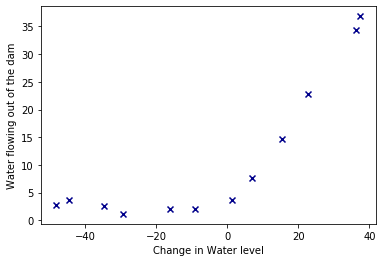

In [24]:
data = loadmat('ex5data1.mat')

X_train = data['X']
y_train = data['y']

fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.set_xlabel('Change in Water level')
ax.set_ylabel('Water flowing out of the dam')
ax.scatter(X_train, y_train, marker='x', color = 'darkblue')

plt.show()

### Calculation and Optimisation for Training Data

In [25]:
# Check Iteration

X_train = data['X']
y_train = data['y']

m,n = X_train.shape
X_tr_upd = np.append(np.ones([m,1]),X_train,axis=1)
m,n = X_tr_upd.shape

# Ones theta
theta_1s = np.ones([n,1])

lmb = 1
J_1, grad1  = cost_grad(theta_1s, X_tr_upd, y_train, lmb)
print('The cost function (J) for unity parameters with lambda = 0 is',J_1) # --> Andrew's exercise case
print(f'The Gradient for unity parameters with lambda = 0 is G1={grad1[0].round(2)} and G2={grad1[1].round(2)}')

The cost function (J) for unity parameters with lambda = 0 is [303.99319222]
The Gradient for unity parameters with lambda = 0 is G1=[-15.3] and G2=[598.25]


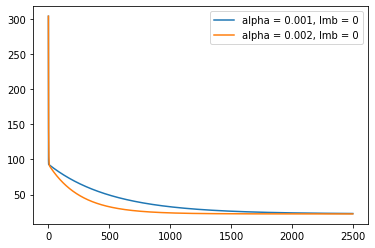

Results of Gradient Descent with alpha = 0.001:
1. The minimum cost, J_min = 303.95.

2. The parameters theta are:
[[12.01868449]
 [ 0.36136667]].


In [26]:
# Gradient Descent

lmb = 0 # --> Zero lambda for Training Set Parameter Optimisation
alpha_iter = [0.001, 0.002]
num_iter = 2500

fig, ax = plt.subplots(1,1)

theta_opt = []
for i in range(len(alpha_iter)):
    theta = np.ones([n,1])
    J_his = []
    J_his_iter, theta_iter = grad_descent(theta, X_tr_upd, y_train, alpha_iter[i], lmb, num_iter)
    J_his.append(J_his_iter)
    ax.plot(J_his[-1], label=f'alpha = {alpha_iter[i]}, lmb = 0')
    theta_opt.append(theta_iter)
    
ax.legend()
plt.show()

print(f'Results of Gradient Descent with alpha = 0.001:\
\n1. The minimum cost, J_min = {round(J_his[0][0][0],2)}.\
\n\n2. The parameters theta are:\n{theta_opt[0]}.')

#### Regression Fit Graph

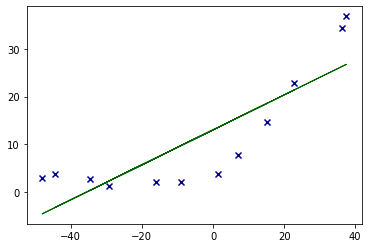

In [27]:
theta_final = theta_opt[-1]
h = X_tr_upd.dot(theta)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, y_train, marker='x', color = 'darkblue')
ax.plot(X_train, h, color='darkgreen', linewidth = 1)
plt.show()

## Learning Curve

In [28]:
X_cv = data['Xval']
p,q = X_cv.shape
X_cv_upd = np.append(np.ones([p,1]),X_cv,axis=1)
y_cv = data['yval']

print(f'The number of training sets available are {int(len(X_train))}')
print(f'The number of cross-validation sets available are {int(len(X_cv_upd))}')

The number of training sets available are 12
The number of cross-validation sets available are 21


#### Learning Curve Function

In [29]:
def learncurve(theta, X, y, X_val, y_val, alpha, lmb, num_iter):
    theta_tsu = []
    J_tsu_err = []
    J_cv = []
    
    for i in range(1, len(X)):
        X_tsu = X[0:i] # --> Iterating in progressive subsets, adding training sets one by one
        y_tsu = y[0:i]
        
        J_his, tht = grad_descent(theta, X_tsu, y_tsu, alpha, lmb, num_iter)
        J_lmb0 , G = cost_grad(tht, X_tsu, y_tsu, lmb)
        J_cross, G_cv = cost_grad(tht, X_val, y_val, lmb) #--> X_cv, y_cv is being called. 

        theta_tsu.append(tht)
        J_tsu_err.append(J_lmb0)
        J_cv.append(J_cross)
        
    return theta_tsu, J_tsu_err, J_cv

theta = np.ones([n,1])
theta_train, error_train, error_cv = learncurve(theta, X_tr_upd, y_train, X_cv_upd, y_cv, alpha=0.001, lmb=0, num_iter=2500)

#### First Order Regression Learning curve: Training error v/s Cross-validation error
<blockquote>As the methodology involves calculating cost functions incrementally i.e. from 2 training sets and adding an additional set every step, it is better to use a low value of $\alpha$.<br>
    This is to avoid sudden divergence and runtime/overflow errors.<br>
    $\alpha = 0.001$

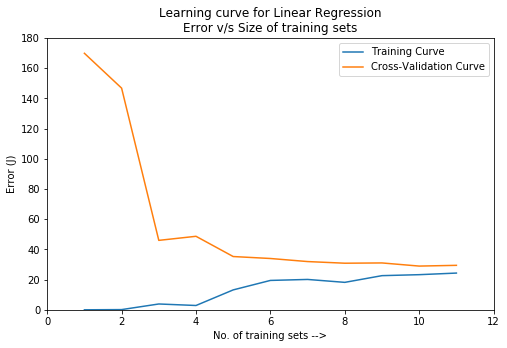

Final iteration TRAINING error is 24.32.
Final iteration CROSS-VALIDATION error is 29.44.

The Linear Regression Curve has HIGH BIAS (Underfit) and the error values are high.
Also, since the curve is a very bad fit to the data, even a small increase in alpha is leading to divergence.


In [30]:
subset_size = np.arange(1,12,1)

fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(subset_size, error_train, label = 'Training Curve')
ax.plot(subset_size, error_cv, label = 'Cross-Validation Curve')

ax.set_xlim(0,12)
ax.set_xlabel('No. of training sets -->')
ax.set_ylim(0,180)
ax.set_ylabel('Error (J)')
ax.set_title('Learning curve for Linear Regression\nError v/s Size of training sets')
ax.legend()

plt.show()

print(f'Final iteration TRAINING error is {round(error_train[-1][0],2)}.')
print(f'Final iteration CROSS-VALIDATION error is {round(error_cv[-1][0],2)}.')
print('\nThe Linear Regression Curve has HIGH BIAS (Underfit) and the error values are high.\
\nAlso, since the curve is a very bad fit to the data, even a small increase in alpha is leading to divergence.')

LARGE TRAINING DATA ERROR THAT INCREASES WITH SET SIZE INDICATES A HIGH BIAS MODEL, ALSO CALLED AN UNDERFIT MODEL.  

## 2. Higher Order Linear Regression

#### Feature Normalisation and Optimisation

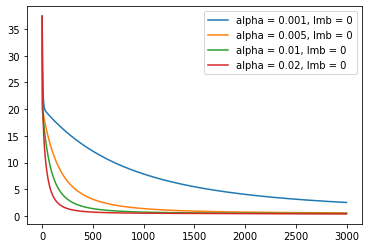

Smooth Convergence is observed for alpha values of 0.01 and 0.02.


In [31]:
X2_train = data['X']
y_train = data['y']
X2_tr_, mu, sd = feat_norm(X2_train)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=8)

X2_tr_poly = poly.fit_transform(X2_tr_)

## Learning rate iteration
m,n = X2_tr_poly.shape

lmb = 0 # --> Zero lambda for Training Set Parameter Optimisation
alpha_iter = [0.001, 0.005, 0.01, 0.02]
num_iter = 3000

fig, ax = plt.subplots(1,1)

theta_opt = []
for i in range(len(alpha_iter)):
    theta_p = np.ones([n,1])
    J_his = []
    J_his_iter, theta_iter = grad_descent(theta_p, X2_tr_poly, y_train, alpha_iter[i], lmb, num_iter)
    J_his.append(J_his_iter)
    ax.plot(J_his[-1], label=f'alpha = {alpha_iter[i]}, lmb = 0')
    theta_opt.append(theta_iter)
    
ax.legend()
plt.show()

print('Smooth Convergence is observed for alpha values of 0.01 and 0.02.')

#### Regression Curve for the Polynomial Function

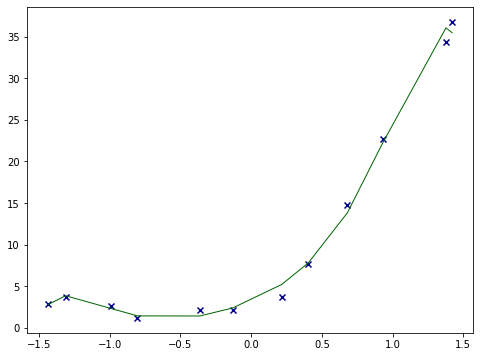

In [32]:
theta_poly = theta_opt[-1] # Alpha = 0.02 chosen

h = X2_tr_poly.dot(theta_poly)
Xh = np.append(X2_tr_, h, axis = 1)
Xh_sort = Xh[Xh[:,0].argsort()]

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(X2_tr_, y_train, marker='x', color = 'darkblue')
ax.plot(Xh_sort[:,0], Xh_sort[:,1], color='darkgreen', linewidth = 1)
plt.show()

#### Higher Order Regression Learning curve: Training error v/s Cross-validation error
<blockquote> As in first order regression, a low value of $\alpha = 0.001$ is used.

In [33]:
X_cv = data['Xval']
X_cv_, mu2, sd2 = feat_norm(X_cv)
X_cv_poly = poly.fit_transform(X_cv_)

In [34]:
m,n = X2_tr_poly.shape
theta_p = np.ones([n,1])
theta_train, error_train_poly, error_cv_poly = learncurve(theta_p, X2_tr_poly, y_train, X_cv_poly, y_cv, 
                                                          alpha=0.002, lmb=0, num_iter=1000)

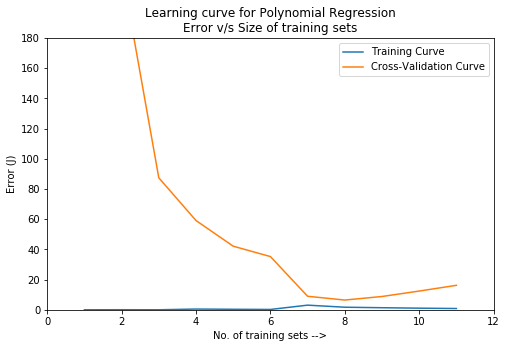

Final iteration TRAINING error is 0.85.
Final iteration CROSS-VALIDATION error is 16.21.

The Polynomial Regression Curve has much lower error values in both the training and Cross-Validation sets.
CV Error = 4.7458.


In [35]:
subset_size = np.arange(1,12,1)

fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(subset_size, error_train_poly, label = 'Training Curve')
ax.plot(subset_size, error_cv_poly, label = 'Cross-Validation Curve')

ax.set_xlim(0,12)
ax.set_xlabel('No. of training sets -->')
ax.set_ylim(0,180)
ax.set_ylabel('Error (J)')
ax.set_title('Learning curve for Polynomial Regression\nError v/s Size of training sets')
ax.legend()

plt.show()

print(f'Final iteration TRAINING error is {round(error_train_poly[-1][0],2)}.')
print(f'Final iteration CROSS-VALIDATION error is {round(error_cv_poly[-1][0],2)}.')
print(f'\nThe Polynomial Regression Curve has much lower error values in both the training and Cross-Validation sets.\
\nCV Error = {round(min(np.array(error_cv_poly) - np.array(error_train_poly))[0],4)}.')

### Iteration on lambda using Cross-validation data to reduce Variance
<blockquote>
The methodology is:<br><br>
    • Optimise the parameters ($\theta_n$) using the Gradient descent algorithm on the training data for multiple lambda iterations.<br>
    • The optimised parameters will be input as 'theta' to training and Cross-validation data to obtain the training (err_train) and Cross-validation cost function (err_cv). <br>
    • Note that lmb must be zero while calculating these errors since lmb value had already been considered during gradient descent.<br>

In [36]:
lmb_iter = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
J_train = []
J_val = []

for i in range(len(lmb_iter)):
    theta_p = np.ones([n,1])
    J_his_iter, theta_iter = grad_descent(theta_p, X2_tr_poly, y_train, alpha = 0.02, lmb = lmb_iter[i], num_iter=3000)
    
    j_tr, G_tr = cost_grad(theta_iter, X2_tr_poly, y_train, lmb=0)
    J_train.append(j_tr)
    
    j_cv, G_cv = cost_grad(theta_iter, X_cv_poly, y_cv, lmb=0)
    J_val.append(j_cv)


Observations for the polynomial regression model:
1. At lambda=3, we see the convergence of both training and cross validation error values.
2. It is also checked that for a range of alpha values from 0.001 to 0.01, the regularisation parameter is ideal at 3.
3. Hence, the values of lambda are more critical and important when compared with alpha.


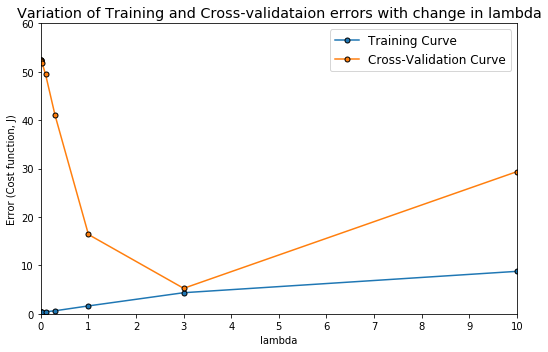

In [37]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.plot(lmb_iter, J_train, label = 'Training Curve', marker='o', markeredgecolor='black', markersize = 5)
ax.plot(lmb_iter, J_val, label = 'Cross-Validation Curve', marker='o', markeredgecolor='black', markersize = 5)

ax.set_xlim(0,10,1)
ax.set_xticks(range(0,11,1))
ax.set_xlabel('lambda')
ax.set_ylim(0,60)
ax.set_ylabel('Error (Cost function, J)')
ax.legend(fontsize='large')
ax.set_title('Variation of Training and Cross-validataion errors with change in lambda',size='x-large')

print('Observations for the polynomial regression model:\
\n1. At lambda=3, we see the convergence of both training and cross validation error values.\
\n2. It is also checked that for a range of alpha values from 0.001 to 0.01, the regularisation parameter is ideal at 3.\
\n3. Hence, the values of lambda are more critical and important when compared with alpha.')

plt.tight_layout()
plt.show()

### Final Regression Curve with lambda = 3

In [38]:
# Final Regression functions and parameters
theta_p = np.ones([n,1])
J_his_final, theta_final = grad_descent(theta_p, X2_tr_poly, y_train, alpha = 0.02, lmb = 3, num_iter=3000)

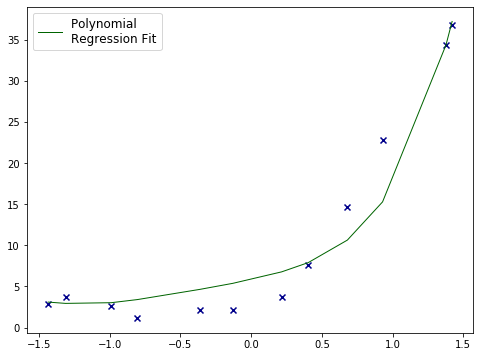

The minimum error on the cost function is 7.89
The optimised parameters are [ 5.83  3.78  1.99  2.31  1.58  1.15  0.92 -0.14 -0.23]


In [39]:
theta_poly_final = theta_final 

h = X2_tr_poly.dot(theta_poly_final)
Xh = np.append(X2_tr_, h, axis = 1)
Xh_sort = Xh[Xh[:,0].argsort()]

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(X2_tr_, y_train, marker='x', color = 'darkblue')
ax.plot(Xh_sort[:,0], Xh_sort[:,1], color='darkgreen', linewidth = 1, label='Polynomial \nRegression Fit')
ax.legend(fontsize='large', loc='upper left')
plt.show()

print(f'The minimum error on the cost function is {round(J_his_final[-1][0],2)}')
print(f'The optimised parameters are {theta_final.flatten().round(2)}')

# 5. Results on Testing Data

In [40]:
X_test = data['Xtest']
y_test = data['ytest']

In [41]:
X_test_norm = (X_test - mu)/sd
X_test_poly = poly.fit_transform(X_test_norm)

J_test, G_test = cost_grad(theta_poly_final, X_test_poly, y_test, lmb=0)
print(f'The cost function error for Test data is found to be {round(J_test[0],4)}.\
\nAs the test error < CV error (4.8), the current learning is acceptable.')

The cost function error for Test data is found to be 3.1953.
As the test error < CV error (4.8), the current learning is acceptable.
